In [56]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
#textblob to apply sentiment analysis 
from textblob import TextBlob
import random
import seaborn as sns
sns.set()

In [83]:
#read the csv file containing musks tweets
tweets = pd.read_csv('../using_twint/musks_tweets.csv')
tweets["date"].head(1)

0    2017-12-26
Name: date, dtype: object

In [38]:
#get a particular tweet text
some_tweet = tweets.iloc[random.randint(1, 100)]['tweet']
print(some_tweet)
#get the 'sentiment' of a particular tweet 
analysis = TextBlob(some_tweet)
print(analysis.sentiment)

Hate it when that happens. Some people are so rude!
Sentiment(polarity=-0.5875, subjectivity=0.75)


In [105]:
sentiment_array = []
date_array = []

In [106]:
#store sentiments into dataframe
#I DONT KNOW HOW TO GET THIS TO WORK?? 

for index, row in tweets.iterrows():
    text = tweets.iloc[index]['tweet']
    analysis = TextBlob(text)
    row['Polarity'] = analysis.sentiment[0]
    row['Subjectivity'] = analysis.sentiment[1]
    sentiment_array.append(analysis.sentiment[0])
    date_array.append(tweets.iloc[index]['date'])



In [79]:
import quandl
%matplotlib inline
%pylab inline
quandl.ApiConfig.api_key = "cHs3hSC-ys83Msb8qXyh"#This is Jorge's key, get yourself a new one.

def datetime_from_utc_to_local(utc_datetime):
    now_timestamp = time.time()
    offset = datetime.datetime.fromtimestamp(now_timestamp) - datetime.datetime.utcfromtimestamp(now_timestamp)
    return utc_datetime + offset

Populating the interactive namespace from numpy and matplotlib


In [112]:
print(datetime_from_utc_to_local(tweets['date'].tail(1).astype('datetime64[ns]'))) # Beginning of period 


2247   2014-12-18 16:00:00
Name: date, dtype: datetime64[ns]


In [84]:
import matplotlib.cbook as cbook
import pylab
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
tweets['date'] = datetime_from_utc_to_local(tweets['date'].astype('datetime64[ns]'))
from pylab import *
pylab.rcParams['figure.figsize'] = (15, 9)

#ax.set_title('fig.autofmt_xdate fixes the labels')
#plt.plot(tweets["date"],sentiment_array)

In [129]:
start_date = datetime.datetime(2016,1,1) # Beginning of period 
end_date = datetime.datetime(2016,5,1)

stock = "TSLA" # some stock label we are interested in
data = quandl.get("WIKI/" + stock, start_date=start_date, end_date=end_date) #download data with quandl


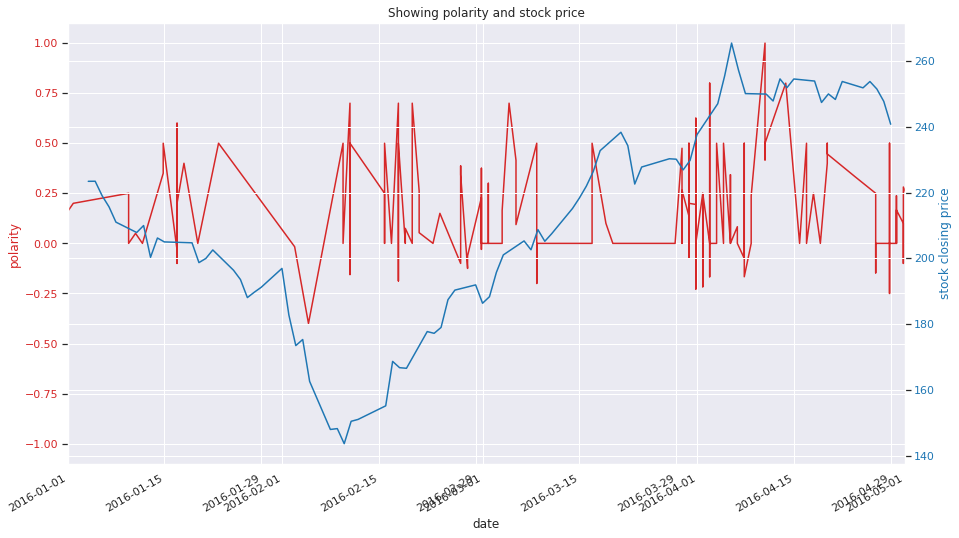

In [136]:
fig, ax1 = plt.subplots()
from ipykernel import kernelapp as app
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('polarity', color=color)
ax1.plot(date_array,sentiment_array, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('stock closing price', color=color)  # we already handled the x-label with ax1
ax2.plot(data["Close"],label="Daily closing price", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(start_date,end_date);
ax2.set_title("Showing polarity and stock price");

In [119]:
print(len(data["Close"]),len(date_array))

759 2248
